<a href="https://colab.research.google.com/github/Henkin2th/AIPI-590.05-Assignement/blob/main/ML_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ML using imodels**
This notebook demonstrates the implementation of three machine learning models from the `imodels` library for customer churn prediction. The dataset used is the `diabetes` dataset, and models implemented include `RuleFitRegressor`, `FIGSClassifier`, and `HSTreeClassifierCV`.

## Models Used
- **RuleFitRegressor**: A rule-based regression model
- **FIGSClassifier**: A classifier based on the Fast Interpretable Greedy-Tree Sums
- **HSTreeClassifierCV**: A decision tree model with cross-validation

## For each model:

1.   Training and predictions
2.   Evaluation of performance using metrics (e.g., ROC curve, accuracy)
3.   Visualizations for each model’s results


In [4]:
pip install imodels

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 243.0/243.0 kB 5.6 MB/s eta 0:00:00


## Importing Libraries

In [71]:
import numpy as np
from scipy.io.arff import loadarff
import os
import urllib.request
from io import BytesIO
from io import StringIO

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree, DecisionTreeClassifier
from sklearn import metrics
from IPython.display import display

# installable with: `pip install imodels`
import imodels
from imodels import FIGSClassifier, HSTreeClassifierCV
from imodels import RuleFitRegressor
from imodels.discretization import ExtraBasicDiscretizer
from imodels.tree import gosdt
np.random.seed(13)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Loading the Dataset
We are using the `diabetes.arff` dataset from a GitHub repository, which contains features related to diabetes test results.

In [65]:
def get_diabetes_data():
    '''Load (classification) data on diabetes from GitHub'''

    # URL of the raw diabetes.arff file in the GitHub repository
    url = 'https://raw.githubusercontent.com/Henkin2th/AIPI-590.05-Assignement/main/ML_II/diabetes.arff'

    # Download the ARFF file
    response = urllib.request.urlopen(url)

    # Read and decode the binary response to a UTF-8 string
    data_bytes = response.read()
    data_str = data_bytes.decode('utf-8')

    # Load ARFF data from the decoded string using StringIO
    data = loadarff(StringIO(data_str))

    # Convert ARFF data to a NumPy array
    data_np = np.array(list(map(lambda x: np.array(list(x)), data[0])))

    # Extract features and labels
    X = data_np[:, :-1].astype('float32')  # All columns except the last one are features
    y_text = data_np[:, -1].astype(str)  # The last column is the label (as text)

    # Convert textual labels to binary (0-1)
    y = (y_text == 'tested_positive').astype(int)  # tested_positive -> 1, tested_negative -> 0

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.75)

    # Feature names (based on the diabetes dataset)
    feature_names = [
        "#Pregnant", "Glucose concentration test", "Blood pressure(mmHg)",
        "Triceps skin fold thickness(mm)", "2-Hour serum insulin (mu U/ml)",
        "Body mass index", "Diabetes pedigree function", "Age (years)"
    ]

    return X_train, X_test, y_train, y_test, feature_names


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# **Loading and Preprocessing the Data**
The code will include data loading, label conversion, and splitting into training and testing sets.

I am using *Pima Indians Diabetes Database*

Link to dataset: https://www.openml.org/search?type=data&sort=runs&id=37&status=active

In [54]:
X_train, X_test, y_train, y_test, feat_names = get_diabetes_data()
    # feat_names meanings:
    # ["#Pregnant", "Glucose concentration test", "Blood pressure(mmHg)",
    # "Triceps skin fold thickness(mm)",
    # "2-Hour serum insulin (mu U/ml)", "Body mass index", "Diabetes pedigree function", "Age (years)"]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


**Helper method used for visualizations of each model’s results**

In [55]:
def viz_classification_preds(probs, y_test):
    '''look at prediction breakdown
    '''
    plt.subplot(121)
    plt.hist(probs[:, 1][y_test == 0], label='Class 0')
    plt.hist(probs[:, 1][y_test == 1], label='Class 1', alpha=0.8)
    plt.ylabel('Count')
    plt.xlabel('Predicted probability of class 1')
    plt.legend()

    plt.subplot(122)
    preds = np.argmax(probs, axis=1)
    plt.title('ROC curve')
    fpr, tpr, thresholds = metrics.roc_curve(y_test, preds)
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.plot(fpr, tpr)
    plt.tight_layout()
    plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Model 1: RuleFitRegressor

In [76]:
# fit a rulefit model
rulefit = RuleFitRegressor(max_rules=10)
rulefit.fit(X_train, y_train, feature_names=feat_names)

# get test performance
preds = rulefit.predict(X_test)
print(f'Test R2: {metrics.r2_score(y_test, preds):0.2f}')

rulefit

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Test R2: 0.21


RuleFitRegressor(max_rules=10)

In [77]:
# inspect and print the rules
print('Rulefit has an alternative visualization:')
rules = rulefit._get_rules()
rules = rules[rules.coef != 0].sort_values("support", ascending=False)
    # 'rule' is how the feature is constructed
    # 'coef' is its weight in the final linear model
    # 'support' is the fraction of points it applies to
display(rules[['rule', 'coef', 'support']].style.background_gradient(cmap='viridis'))

Rulefit has an alternative visualization:


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,rule,coef,support
9,#Pregnant <= 9.5 and Glucose concentration test <= 157.5 and Body mass index <= 45.4 and Diabetes pedigree function <= 0.7405,-0.077959,0.682292
10,#Pregnant <= 5.5 and Glucose concentration test <= 158.5,-0.021188,0.671875
8,#Pregnant <= 8.5 and Glucose concentration test <= 157.5 and Glucose concentration test > 34.0 and Diabetes pedigree function <= 0.831 and Age (years) <= 43.5,-0.013747,0.604167
12,Age (years) <= 54.5 and Age (years) > 26.5,0.010846,0.552083
11,#Pregnant <= 6.5 and Glucose concentration test <= 122.5 and Diabetes pedigree function <= 1.227,-0.127090,0.500000
15,Triceps skin fold thickness(mm) <= 38.5 and Body mass index > 30.05 and Diabetes pedigree function > 0.206 and Age (years) <= 54.5 and Age (years) > 24.5,0.021492,0.328125
13,Glucose concentration test > 123.0 and Body mass index > 27.9 and Diabetes pedigree function <= 1.1515,0.078060,0.322917
16,Glucose concentration test > 122.5 and 2-Hour serum insulin (mu U/ml) <= 479.5 and Body mass index > 27.65 and Diabetes pedigree function > 0.2095,0.061160,0.291667
14,Glucose concentration test > 123.0 and Body mass index > 31.4,0.019076,0.270833


## Model 2: FIGSClassifier

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


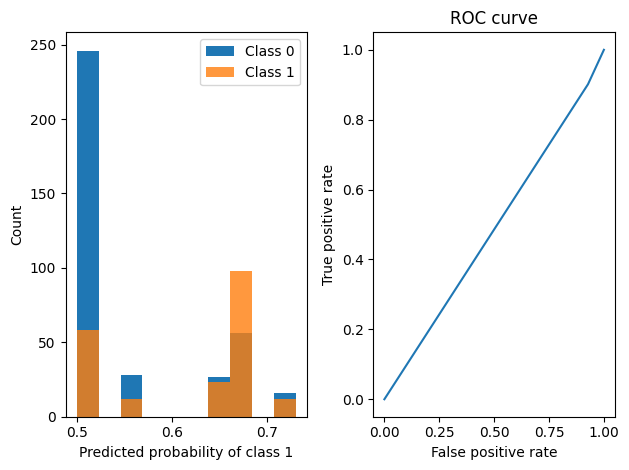

FIGSClassifier(max_rules=7)

In [57]:
# specify a decision tree with a maximum depth
figs = FIGSClassifier(max_rules=7)
figs.fit(X_train, y_train, feature_names=feat_names)

# calculate mse on the training data
probs = figs.predict_proba(X_test)
# print(f'test mse: {np.mean(np.square(preds-y)):0.2f}')
viz_classification_preds(probs, y_test)

figs

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Alternative visualization:


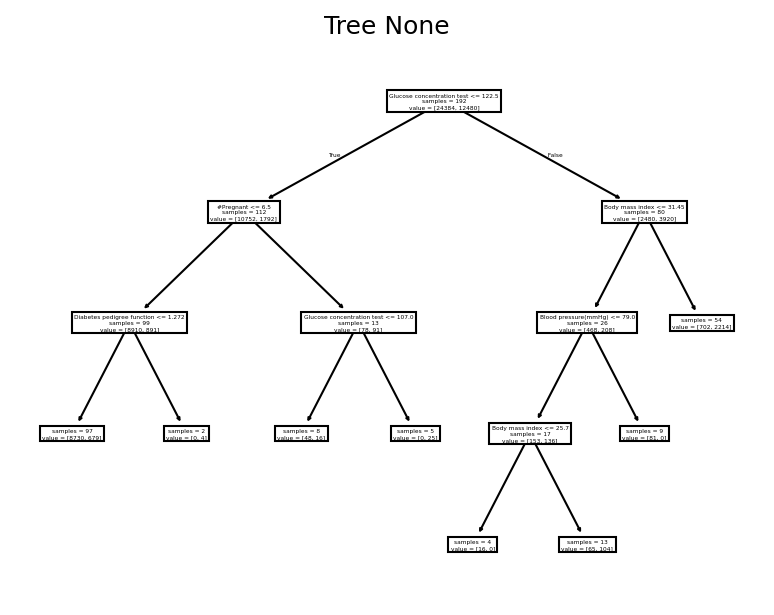

In [58]:
print('Alternative visualization:')
figs.plot()

## Model 3: HSTreeClassifierCV

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2956: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2956: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2956: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2956: UserWarning: The y_pr

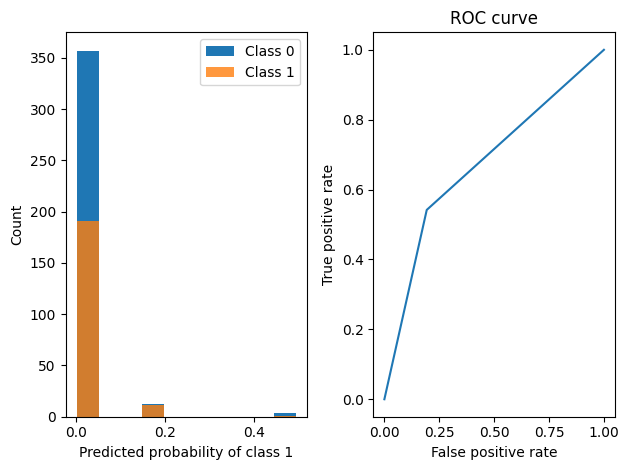

HSTreeClassifierCV(estimator_=DecisionTreeClassifier(max_leaf_nodes=7), reg_param_list=array([0.e+00, 1.e-01, 1.e+00, 1.e+01, 5.e+01, 1.e+02, 5.e+02]), shrinkage_scheme_='node_based', cv=3, scoring=None)

In [59]:
# specify a decision tree with a maximum depth
dt = HSTreeClassifierCV(max_leaf_nodes=7)
dt.fit(X_train, y_train, feature_names=feat_names)

# calculate mse on the training data
probs = dt.predict_proba(X_test)
# print(f'test mse: {np.mean(np.square(preds-y)):0.2f}')
viz_classification_preds(probs, y_test)

dt

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Alternative visualization:


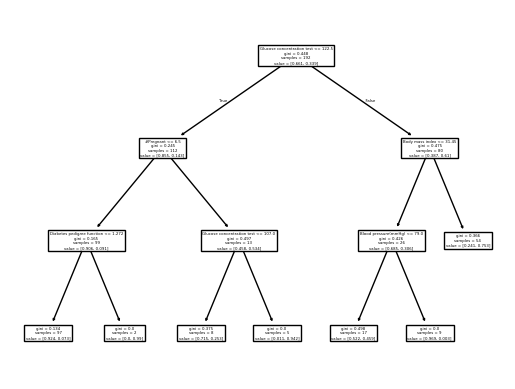

In [61]:
print('Alternative visualization:')
plot_tree(dt.estimator_, feature_names=feat_names)
plt.show()

# **Reference:**


In [ ]:
@software{
	imodels2021,
	title        = {imodels: a python package for fitting interpretable models},
	journal      = {Journal of Open Source Software},
	publisher    = {The Open Journal},
	year         = {2021},
	author       = {Singh, Chandan and Nasseri, Keyan and Tan, Yan Shuo and Tang, Tiffany and Yu, Bin},
	volume       = {6},
	number       = {61},
	pages        = {3192},
	doi          = {10.21105/joss.03192},
	url          = {https://doi.org/10.21105/joss.03192},
}